In [569]:
import pandas as pd
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
df=pd.read_csv("train.csv")
#sibsp: number of siblings or spouses
#parch: number of parent or children
#fare : ticket rent
#Embarked : from which port a passenger started his journey
#s : Southampton, Q : Queenstown , C : Cherbourg
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [570]:
df.shape

(891, 12)

In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [572]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [573]:
s=df[df['Survived']==1].count()
s

PassengerId    342
Survived       342
Pclass         342
Name           342
Sex            342
Age            290
SibSp          342
Parch          342
Ticket         342
Fare           342
Cabin          136
Embarked       340
dtype: int64

In [574]:
s=df[df['Survived']==1]['Sex'].value_counts()
s

female    233
male      109
Name: Sex, dtype: int64

In [575]:
#common function define
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
def bar_chart(colum):
    survived=train[train['Survived']==1][colum].value_counts()
    dead=train[train['Survived']==0][colum].value_counts()
    df1=pd.DataFrame([survived,dead])
    df1.index=['survived','dead']
    ax=df1.plot(kind='bar',figsize=(10,8))
    totals=[]
    for i in ax.patches:
        totals.append(i.get_height())
    total=sum(totals)
    for i in ax.patches:
        ax.text(i.get_x(), i.get_height() +5, 
        str(round((i.get_height()/total)*100 ,1))+'%', fontsize=15,color='dimgrey')



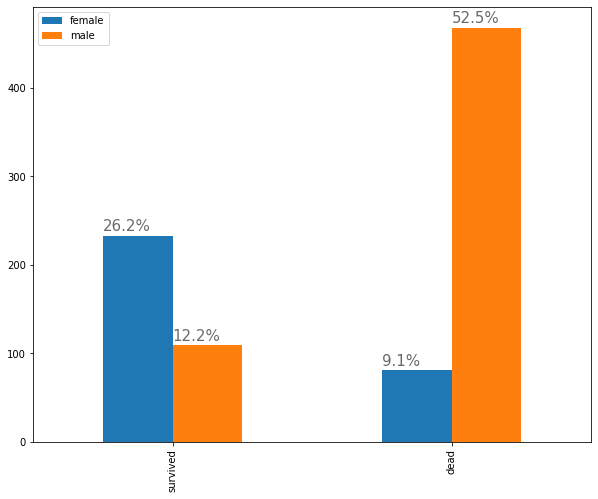

In [576]:
bar_chart('Sex')

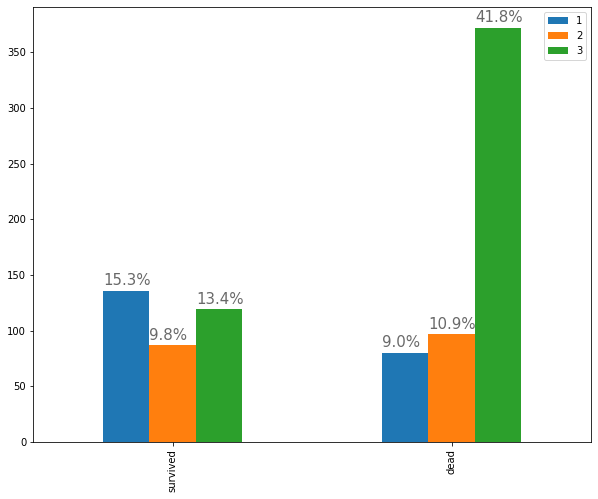

In [577]:
bar_chart('Pclass')


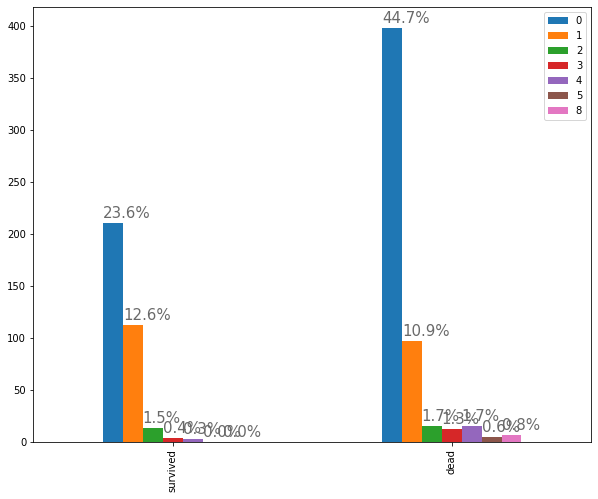

In [578]:
bar_chart('SibSp')

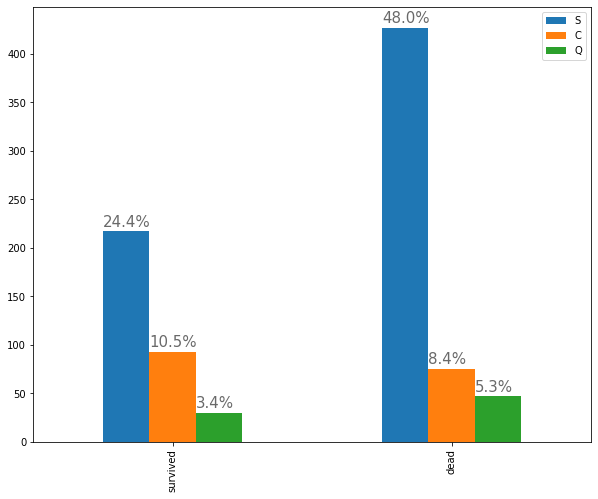

In [579]:
bar_chart('Embarked')



In [580]:
s=df['Name']

s

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [581]:
train_test_data=[train,test]
for x in train_test_data:
    x['title']=x['Name'].str.extract('([A-Za-z]+)\.',expand=False)
    
s=train['title'].value_counts()
s

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Mme           1
Lady          1
Capt          1
Countess      1
Ms            1
Sir           1
Don           1
Name: title, dtype: int64

In [582]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [583]:
#mr:0,miss:1,mrs:2,others:3
title_map={"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,
          "Major":3,"Col":3,"Mlle":3,"Capt":3,"Don":3,'Dona':3,
          "Lady":3,"Countess":3,"Ms":3,"Sir":3,"Jonkheer":3,"Mme":3}
title_map

{'Mr': 0,
 'Miss': 1,
 'Mrs': 2,
 'Master': 3,
 'Dr': 3,
 'Rev': 3,
 'Major': 3,
 'Col': 3,
 'Mlle': 3,
 'Capt': 3,
 'Don': 3,
 'Dona': 3,
 'Lady': 3,
 'Countess': 3,
 'Ms': 3,
 'Sir': 3,
 'Jonkheer': 3,
 'Mme': 3}

In [584]:
#mapping title name with just 0,1,2,3
for x in train_test_data:
    x['title']=x['title'].map(title_map)
    

In [585]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
title            0
dtype: int64

In [586]:
train['title'].value_counts()

0    517
1    182
2    125
3     67
Name: title, dtype: int64

In [587]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [588]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [589]:
# delete the name column from train dataset
train.drop('Name',axis=1,inplace=True)

In [590]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [591]:
# delete the name column from test dataset
test.drop('Name',axis=1,inplace =True)

In [592]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [593]:
sex_mapping={'male':0,'female':1}
for x in train_test_data:
    x['Sex']=x['Sex'].map(sex_mapping)

In [594]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [595]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


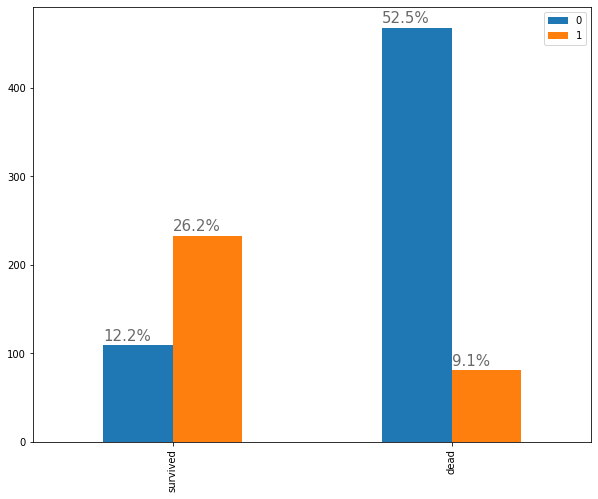

In [596]:
bar_chart('Sex')

In [597]:
s=train['Age'].isnull().sum()
s

177

In [598]:
s=train['Age'].isnull().sum()
s

177

In [599]:
g=train.groupby('title')
g

In [600]:
# fill up missing age in train and test data by the median of its individual title name
train['Age'].fillna(train.groupby('title')['Age'].transform("median"),inplace=True)
test['Age'].fillna(test.groupby('title')['Age'].transform("median"),inplace=True)

In [601]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,1,21.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,0


In [602]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,28.5,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,1,39.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,0,28.5,0,0,359309,8.0500,NaN,S,0


In [603]:
g.get_group(0)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
12,13,0,3,0,20.0,0,0,A/5. 2151,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,0,33.0,0,0,349257,7.8958,NaN,S,0
883,884,0,2,0,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,0
884,885,0,3,0,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,0


In [604]:
test['Age'].isnull().sum()

0

In [605]:
train['Age'].isnull().sum()

0

In [606]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a function to show survived people in the plot
def survive_people(colum1,colum2):
    facet=sns.FacetGrid(train,hue="Survived",aspect=4)
    facet.map(sns.kdeplot,'Age',shade=True)
    facet.set(xlim=(0,train['Age'].max()))
    facet.add_legend()
    plt.xlim(colum1,colum2)
    

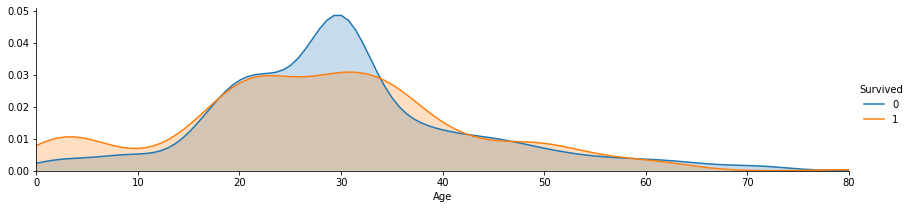

In [607]:
#age between 0 to maximum(80)
survive_people(0,train['Age'].max())

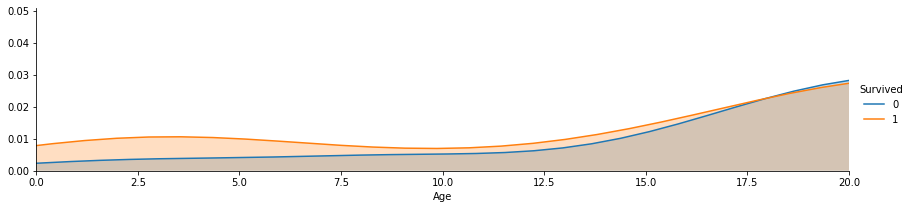

In [608]:
#age between 0 to maximum(0)
survive_people(0,20)

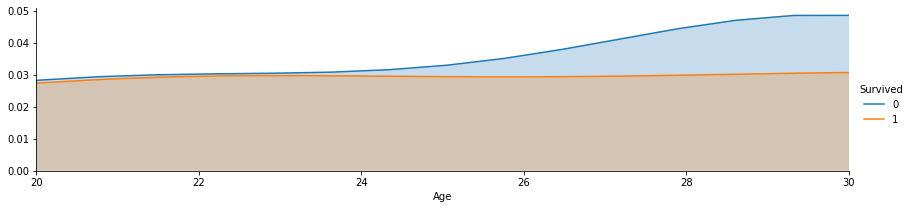

In [609]:
#age between 20 to maximum(30)
survive_people(20,30)

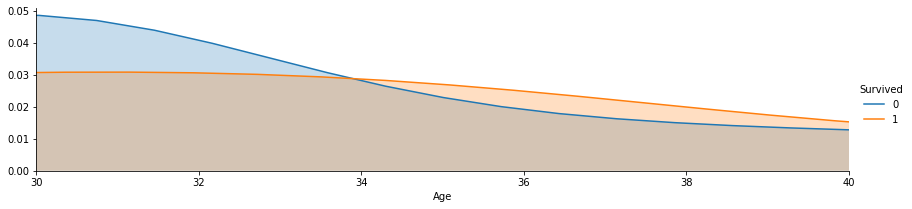

In [610]:
#age between 30 to maximum(40)
survive_people(30,40)

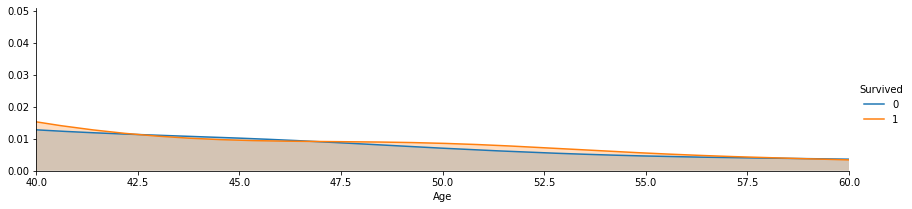

In [611]:
#age between 40 to maximum(60)
survive_people(40,60)

In [612]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [613]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
title          418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [614]:
train.loc[train['Age']==2 ]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
16,17,0,3,0,2.0,4,1,382652,29.1250,NaN,Q,3
119,120,0,3,1,2.0,4,2,347082,31.2750,NaN,S,1
205,206,0,3,1,2.0,0,1,347054,10.4625,G6,S,1
297,298,0,1,1,2.0,1,2,113781,151.5500,C22 C26,S,1
340,341,1,2,0,2.0,1,1,230080,26.0000,F2,S,3
479,480,1,3,1,2.0,0,1,3101298,12.2875,NaN,S,1
530,531,1,2,1,2.0,1,1,26360,26.0000,NaN,S,1
642,643,0,3,1,2.0,3,2,347088,27.9000,NaN,S,1
824,825,0,3,0,2.0,4,1,3101295,39.6875,NaN,S,3


In [615]:
train.loc[(train['Age']>=1) & (train['Age']<=1)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
164,165,0,3,0,1.0,4,1,3101295,39.6875,NaN,S,3
172,173,1,3,1,1.0,1,1,347742,11.1333,NaN,S,1
183,184,1,2,0,1.0,2,1,230136,39.0000,F4,S,3
381,382,1,3,1,1.0,0,2,2653,15.7417,NaN,C,1
386,387,0,3,0,1.0,5,2,CA 2144,46.9000,NaN,S,3
788,789,1,3,0,1.0,1,2,C.A. 2315,20.5750,NaN,S,3
827,828,1,2,0,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C,3


In [616]:
#divide age into child,young,adult,mid-age,senior 
train_test_data=[train,test]
for x in train_test_data:
    x.loc[x['Age']<=16,'Age']=0
    x.loc[(x["Age"]>16)&(x['Age']<=26),'Age']=1
    x.loc[(x['Age']>26)&(x['Age']<=36),'Age']=2
    x.loc[(x['Age']>36)&(x['Age']<=62),'Age']=3
    x.loc[x['Age']>62,'Age']=4
    

train.loc[train['Age']==4]

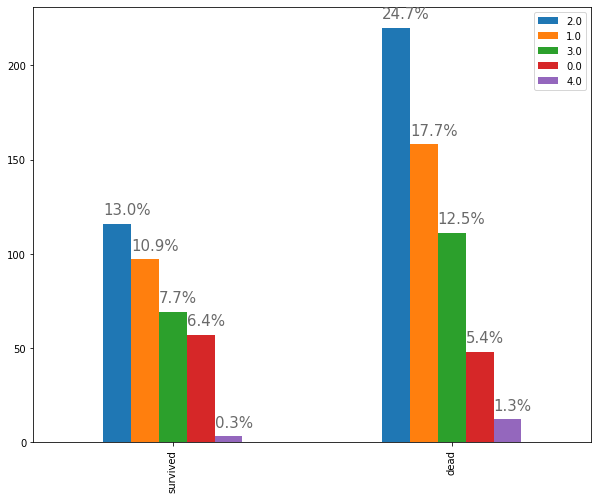

In [617]:
bar_chart('Age')

In [618]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [619]:
#count how many people start their journey from different places
train_test_data=[train,test]
for x in train_test_data:
    pclass1=x[x['Pclass']==1]['Embarked'].value_counts()
    pclass2=x[x['Pclass']==2]['Embarked'].value_counts()
    pclass3=x[x['Pclass']==3]['Embarked'].value_counts()
    

In [620]:
pclass1


C    56
S    50
Q     1
Name: Embarked, dtype: int64

In [621]:
pclass2

S    78
C    11
Q     4
Name: Embarked, dtype: int64

In [622]:
pclass3

S    142
Q     41
C     35
Name: Embarked, dtype: int64

In [623]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
train["Embarked"].fillna("S",inplace=True)

In [624]:
df=pd.DataFrame([pclass1,pclass2,pclass3])
df

,C,S,Q
Embarked,56,50,1
Embarked,11,78,4
Embarked,35,142,41


In [625]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


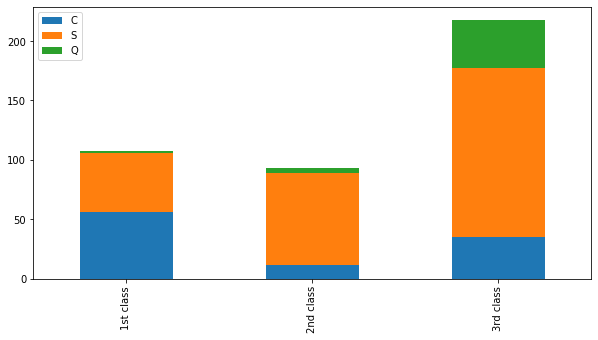

In [626]:
#indexing as first class,second class,third class and ploting 
df=pd.DataFrame([pclass1,pclass2,pclass3])
df.index=['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,5))#which different place that people have come from

In [627]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [628]:
# mapping if s then 0,c=1,q=1
mapping_town={'S':0,'C':1,'Q':2}
train_test_data=[train,test]
for x in train_test_data:
    x['Embarked']=x['Embarked'].map(mapping_town)


In [629]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [630]:
train['Fare'].isnull().sum()

0

In [631]:
train[train['Fare']==0]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
179,180,0,3,0,2.0,0,0,LINE,0.0,NaN,0,0
263,264,0,1,0,3.0,0,0,112059,0.0,B94,0,0
271,272,1,3,0,1.0,0,0,LINE,0.0,NaN,0,0
277,278,0,2,0,2.0,0,0,239853,0.0,NaN,0,0
302,303,0,3,0,1.0,0,0,LINE,0.0,NaN,0,0
413,414,0,2,0,2.0,0,0,239853,0.0,NaN,0,0
466,467,0,2,0,2.0,0,0,239853,0.0,NaN,0,0
481,482,0,2,0,2.0,0,0,239854,0.0,NaN,0,0
597,598,0,3,0,3.0,0,0,LINE,0.0,NaN,0,0
633,634,0,1,0,2.0,0,0,112052,0.0,NaN,0,0


In [632]:
# fill the missing Fare(ship rent) with average value respect to the Pclass

for x in train_test_data:
    x['Fare'].fillna(x.groupby('Pclass')['Fare'].transform("median"),inplace=True)

In [633]:
train[train['Fare']==0]


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
179,180,0,3,0,2.0,0,0,LINE,0.0,NaN,0,0
263,264,0,1,0,3.0,0,0,112059,0.0,B94,0,0
271,272,1,3,0,1.0,0,0,LINE,0.0,NaN,0,0
277,278,0,2,0,2.0,0,0,239853,0.0,NaN,0,0
302,303,0,3,0,1.0,0,0,LINE,0.0,NaN,0,0
413,414,0,2,0,2.0,0,0,239853,0.0,NaN,0,0
466,467,0,2,0,2.0,0,0,239853,0.0,NaN,0,0
481,482,0,2,0,2.0,0,0,239854,0.0,NaN,0,0
597,598,0,3,0,3.0,0,0,LINE,0.0,NaN,0,0
633,634,0,1,0,2.0,0,0,112052,0.0,NaN,0,0


In [634]:
# function for survived people according to the (ship rent) Fare
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
def ship_fare_or_rent(colum1,colum2):
       
        facet=sns.FacetGrid(train,hue="Survived",aspect=4)
        facet.map(sns.kdeplot,'Fare',shade=True)
        facet.set(xlim=(0,train["Fare"].max()))
        facet.add_legend()
        plt.xlim(colum1,colum2)

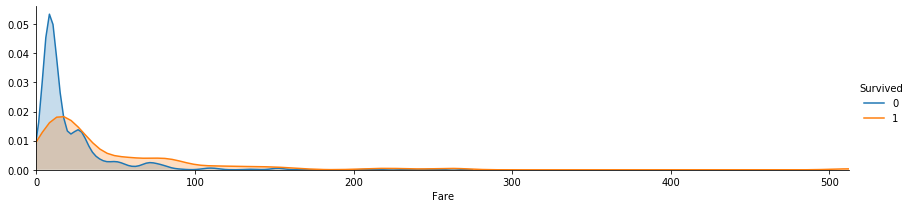

In [635]:
ship_fare_or_rent(0,train['Fare'].max())

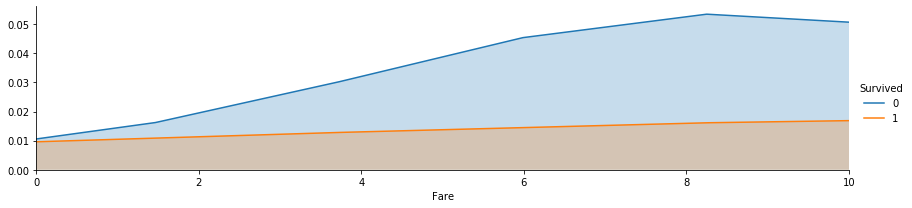

In [636]:
ship_fare_or_rent(0,10)

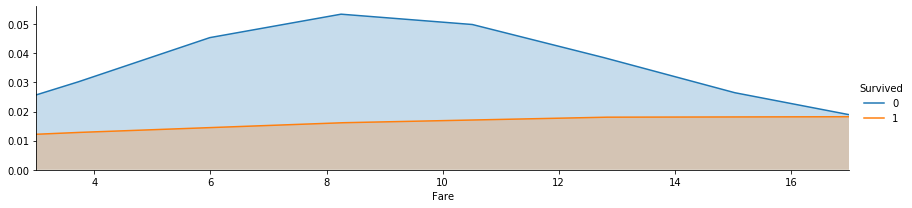

In [637]:
ship_fare_or_rent(3,17)

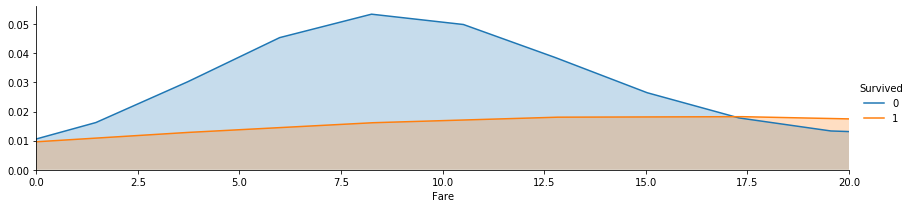

In [638]:
ship_fare_or_rent(0,20)

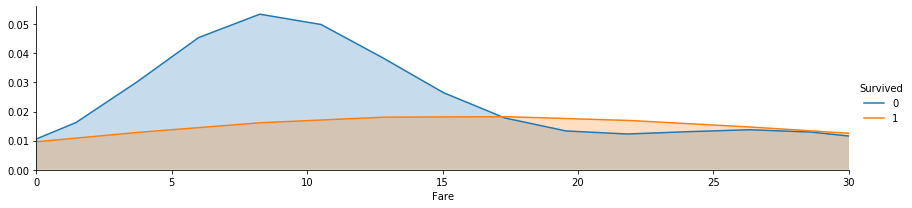

In [639]:
ship_fare_or_rent(0,30)

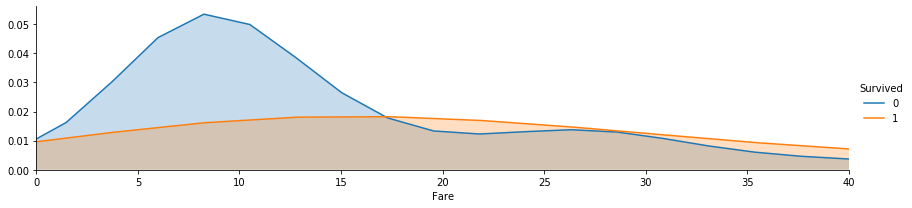

In [640]:
ship_fare_or_rent(0,40)

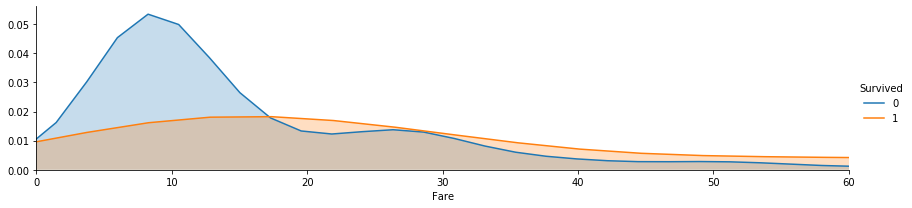

In [641]:
ship_fare_or_rent(0,60)

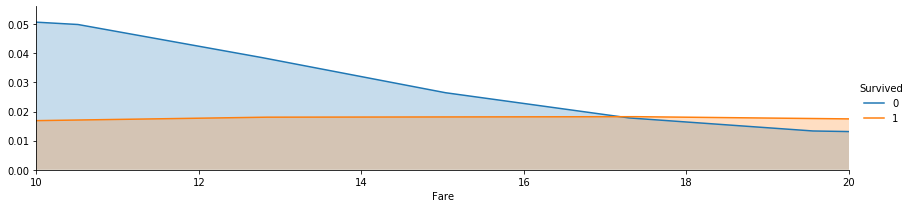

In [642]:
ship_fare_or_rent(10,20)

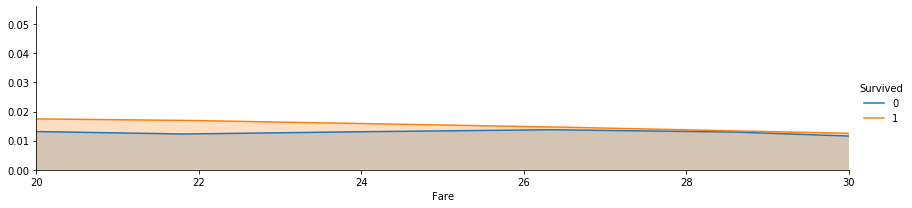

In [643]:
ship_fare_or_rent(20,30)

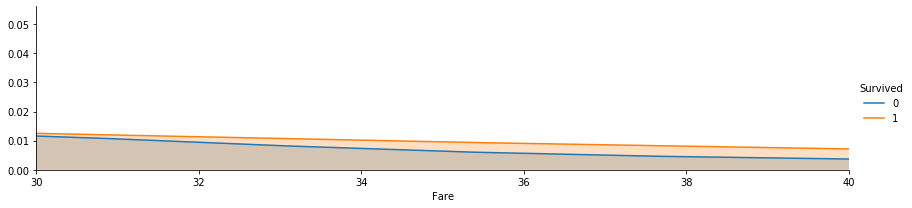

In [644]:
ship_fare_or_rent(30,40)

In [645]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [646]:
train_test_data=[train,test]
for x in train_test_data:
    x.loc[x['Fare']<=17,'Fare']=0
    x.loc[(x['Fare']>17) & (x['Fare']<=30),'Fare']=1
    x.loc[(x['Fare']>30) & (x['Fare']<=100),'Fare']=2

In [647]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,E46,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,2.0,NaN,1,2


In [648]:
train[train['Fare']==0].sum().count()

11

In [649]:
#train.Cabin.value_counts()

In [650]:
#delete the ticket but just first chracter
t=[train,test]
for x in t:
    x['Cabin']=x['Cabin'].str[:1]

In [651]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


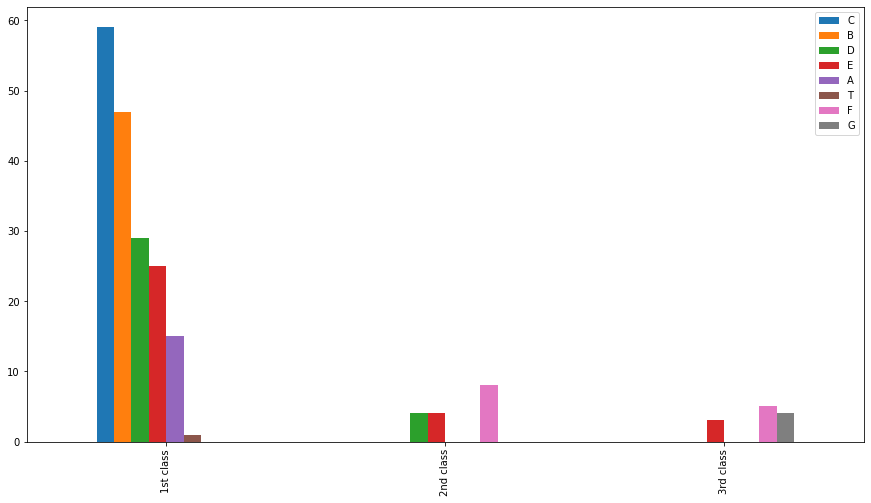

In [652]:
#count how many cabin for 1st,2nd and 3rd class
%matplotlib inline
pclass1=train[train['Pclass']==1]['Cabin'].value_counts()
pclass2=train[train['Pclass']==2]['Cabin'].value_counts()
pclass3=train[train['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([pclass1,pclass2,pclass3])
df.index=('1st class','2nd class','3rd class')
df.plot(kind='bar',figsize=(15,8))


In [653]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [654]:
pclass3

F    5
G    4
E    3
Name: Cabin, dtype: int64

In [655]:
#mapping the cabin with the distance from backup boat
mapping_cabin={'A':0,'B':0.4,'C':.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}
for x in train_test_data:
    x['Cabin']=x['Cabin'].map(mapping_cabin)


In [656]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [657]:
#fill missing Fare with median fare for each pclass

train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [658]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


In [659]:
#treat some member as a family
train["FamilySize"]=train['SibSp']+train['Parch']+1
test["FamilySize"]=test['SibSp']+test['Parch']+1

(0, 11.0)

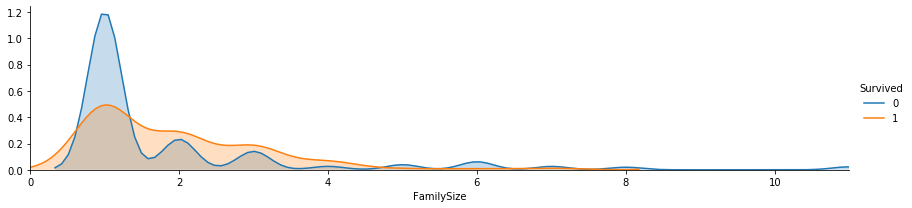

In [660]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade=True)
facet.set(xlim=(0,train["FamilySize"].max()))
facet.add_legend()
plt.xlim(0)

In [661]:
#family mapping 
family_mapping={1:0,2:.4,3:.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4}
for x in train_test_data:
    x['FamilySize']=x['FamilySize'].map(family_mapping)

In [662]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [663]:
# delete the unnecessary column SibSp,Parch
useless=['SibSp','Parch','Ticket']
train=train.drop(useless,axis=1)
test=test.drop(useless,axis=1)

In [664]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0.0,2.0,0,0,0.0


In [665]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
Fare           891 non-null float64
Cabin          891 non-null float64
Embarked       891 non-null int64
title          891 non-null int64
FamilySize     891 non-null float64
dtypes: float64(4), int64(6)
memory usage: 69.7 KB


In [666]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [667]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10,shuffle=True,random_state=0)

In [668]:
train_data=train.drop('Survived',axis=1)
target=train['Survived']
print(train_data.head(5))
train_data.shape,target.shape

   PassengerId  Pclass  Sex  Age  Fare  Cabin  Embarked  title  FamilySize
0            1       3    0  1.0   0.0    2.0         0      0         0.4
1            2       1    1  3.0   2.0    0.8         1      2         0.4
2            3       3    1  1.0   0.0    2.0         0      1         0.0
3            4       1    1  2.0   2.0    0.8         0      2         0.4
4            5       3    0  2.0   0.0    2.0         0      0         0.0


((891, 9), (891,))

In [670]:
clf=DecisionTreeClassifier()
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)

[0.72222222 0.76404494 0.68539326 0.78651685 0.71910112 0.79775281
 0.71910112 0.71910112 0.70786517 0.79775281]
